In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [36]:
import bs4
import requests
import json

adresy_stron = ['https://www.betclic.pl/pilka-nozna-s1/premier-league-c3',
                'https://www.betclic.pl/pilka-nozna-s1/la-liga-c7',
               'https://www.betclic.pl/pilka-nozna-s1/bundesliga-c5',
               'https://www.betclic.pl/pilka-nozna-s1/serie-a-c6',
               'https://www.betclic.pl/pilka-nozna-s1/ligue-1-c4']

adresy_plikow = ['premier_league.json', 'la-liga.json', 'bundesliga.json', 'serie-a.json', 'ligue-1.json']

for adres in adresy_stron:
    
    res = requests.get(adres)
    res.raise_for_status()
    stronka = bs4.BeautifulSoup(res.text, 'html.parser')

    divy = stronka.find_all("div", {'class': 'scoreboard_contestantLabel'}) #drużyny
    spany = stronka.find_all("span", {'class': 'oddValue'}) #kursy

    def prepare_data():
        """Przygotowywanie danych"""
        mecze=list()
        kursy=list()
        dictionary_for_data = dict() #słownik na dane do DATAFRAME!!!
        
        for i in range(len(divy)):
            mecze.append(divy[i].get_text().strip()) #wczytanie nazw drużyn do listy

        for i in range(0,len(spany),6): #po to żeby mieć tylko kursy na zwycięstwa gospodarzy lub gości
            kursy.append(spany[i].get_text().strip().replace(',', '.')) #wczytanie kursów do listy
            kursy.append(spany[i+2].get_text().strip().replace(',', '.'))
    
        for mecz in mecze:
            if mecz not in dictionary_for_data:
                dictionary_for_data[mecz] = ([kursy[0]])
            elif mecz in dictionary_for_data:
                dictionary_for_data[mecz].append(kursy[0])
            del kursy[0]
        del mecze #przyda się jak będę inne ligi analizował
    
        with open(adresy_plikow[0], 'w') as f:
            json.dump(dictionary_for_data, f)
        del adresy_plikow[0]
        del dictionary_for_data
    prepare_data()

In [37]:
df = pd.read_json('la-liga.json', orient='index')

In [38]:
df.rename(columns={0: 'Mecz_1', 1: 'Mecz_2', 2: 'Mecz_3'}, inplace=True)

In [39]:
df.fillna(0, inplace=True)

In [40]:
kursy_1 = []
[kursy_1.append(float(mecz)) for mecz in df['Mecz_1']]
df['Mecz_1'] = kursy_1

In [41]:
kursy_2 = list()
[kursy_2.append(float(mecz)) for mecz in df['Mecz_2']]
df['Mecz_2'] = kursy_2

In [42]:
kursy_3 = list()
[kursy_3.append(float(mecz)) for mecz in df['Mecz_3']]
df['Mecz_3'] = kursy_3

KeyError: 'Mecz_3'

In [44]:
df = df.transpose()

In [20]:
manchestery = df[['Manchester Utd','Manchester City']]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

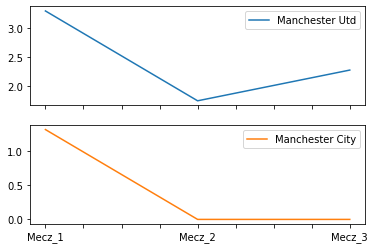

In [21]:
manchestery.plot(subplots=True)

In [184]:
df['Manchester Utd'].corr(df['Manchester City'])

0.9456676052555069

In [46]:
df

,Sevilla,Cádiz,Alaves,Villarreal,Real Madryt,Espanyol,Valencia,Levante,Athletic Bilbao,Atletico Madryt,Elche,Osasuna,Granada,Celta Vigo,Rayo Vallecano,Real Sociedad,Barcelona,Mallorca,Getafe,Betis
Mecz_1,1.59,6.20,3.45,2.15,1.50,6.0,2.29,3.05,3.00,2.55,2.85,2.60,2.75,2.70,3.15,2.43,1.36,8.00,2.75,2.75
Mecz_2,3.15,1.99,4.90,2.35,2.75,2.6,4.80,3.20,1.75,2.60,4.00,2.85,3.90,1.76,3.75,2.25,2.11,1.98,2.18,3.40
